In [ ]:
import pandas as pd

In [ ]:
df_house_prices = pd.read_csv(r'C:\Users\Aluno\OneDrive\Desktop\PROJECTS\data\raw\train.csv')
df_house_prices = df_house_prices.drop(columns=['Id'])

In [12]:
com_piscina = df_house_prices[df_house_prices["PoolArea"] > 0]
sem_piscina = df_house_prices[df_house_prices["PoolArea"] == 0]

# Verify the distribution of PoolQC (Pool Quality) values
print(com_piscina["PoolQC"].value_counts(dropna=False))
print(sem_piscina["PoolQC"].value_counts(dropna=False))

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64
PoolQC
NaN    1453
Name: count, dtype: int64


In [9]:
df_house_prices.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageType        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
Electrical         1
BldgType           0
dtype: int64

In [ ]:
# Fill missing values in the list of categories with "None", due to the 
# fact that these categories are not applicable for some huses types.
none_categories = ["PoolQC", "Alley", "Fence", "FireplaceQu", "GarageQual", "GarageType", 
                   "GarageFinish", "GarageCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
                   "BsmtQual", "BsmtCond", "MasVnrType", "MiscFeature"]
for i in none_categories:
    df_house_prices[i] = df_house_prices[i].fillna("None")

In [ ]:
# Fill missing values in numerical columns with 0
df_house_prices["MasVnrArea"] = df_house_prices["MasVnrArea"].fillna(0)
df_house_prices["GarageYrBlt"] = df_house_prices["GarageYrBlt"].fillna(0)

In [ ]:
# Fill mising values in categorical columns with the mode
df_house_prices['Electrical'] = df_house_prices['Electrical'].fillna(df_house_prices['Electrical'].mode()[0])

In [ ]:
# It groups the 'LotFrontage' values by 'Neighborhood' and fills missing values with the median of each group.
# The reason for this is that 'LotFrontage' measures the linear feet of street connected to the property, 
# and it is likely that properties in the same neighborhood have similar characteristics.
df_house_prices['LotFrontage'] = df_house_prices.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [37]:
print(df_house_prices['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [31]:
df_house_prices.isna().sum().sort_values(ascending=False).head(20)
# We see that there are no more missing values in the dataset.

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [33]:
df_house_prices['TotalLivingArea'] = df_house_prices['1stFlrSF'] + df_house_prices['2ndFlrSF']
+ df_house_prices['LowQualFinSF'] + df_house_prices['GrLivArea'] + df_house_prices['BsmtFinSF1'] + df_house_prices['BsmtFinSF2']
# df_house_prices['TotalArea'] is a new feature that combines all living area spaces in the house.

0       2416
1       2240
2       2272
3       1933
4       2853
        ... 
1455    1647
1456    3026
1457    2615
1458    2156
1459    2376
Length: 1460, dtype: int64

In [40]:
# Let's see the most important feature to predict 'SalesPrice'
from sklearn.ensemble import RandomForestRegressor

X = df_house_prices.drop('SalePrice', axis=1)._get_numeric_data()
y = df_house_prices['SalePrice']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

importances = model.feature_importances_
features = X.columns

# Display top 10 features
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print(feature_importance.head(10))

OverallQual        0.579396
TotalLivingArea    0.090890
TotalBsmtSF        0.040525
BsmtFinSF1         0.033559
2ndFlrSF           0.032551
GrLivArea          0.031158
1stFlrSF           0.025763
GarageCars         0.025587
LotArea            0.015519
GarageArea         0.015230
dtype: float64


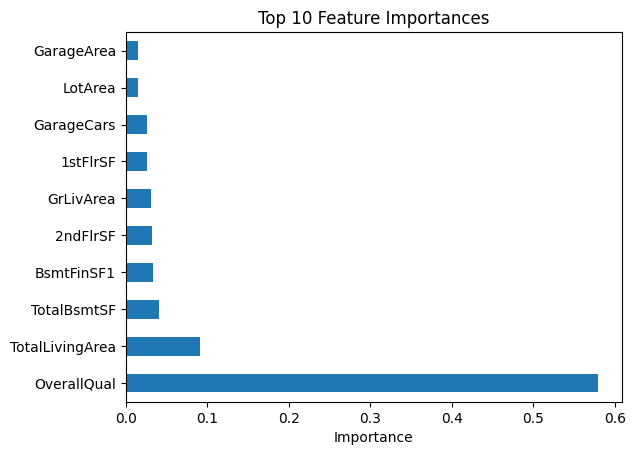

In [44]:
# Visualize feature importances
import matplotlib.pyplot as plt
# As we can see, the most important feature to predict 'SalesPrice' is OverallQual, and so on...
# We can see as well that the new feature 'TotalLivingArea' becames really important to predict.
feature_importance.head(10).plot(kind='barh')
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()